### Homework 6

In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

#### Dataset Preparation

We will use the fuel efficiency dataset.

Preparation
* Fill missing values with zeros.
* Do train/validation/test split with 60%/20%/20% distribution.
* Use the train_test_split function and set the random_state parameter to 1.
* Use DictVectorizer(sparse=True) to turn the dataframes into matrices.

In [3]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv'

In [4]:
!wget $data

--2025-11-05 14:00:38--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 874188 (854K) [text/plain]
Saving to: ‘car_fuel_efficiency.csv.6’

car_fuel_efficiency 100%[===================>] 853.70K  --.-KB/s    in 0.006s  

2025-11-05 14:00:38 (147 MB/s) - ‘car_fuel_efficiency.csv.6’ saved [874188/874188]



In [5]:
df = pd.read_csv(data)

df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [6]:
df.isnull().sum()

engine_displacement      0
num_cylinders          482
horsepower             708
vehicle_weight           0
acceleration           930
model_year               0
origin                   0
fuel_type                0
drivetrain               0
num_doors              502
fuel_efficiency_mpg      0
dtype: int64

In [7]:
df.num_doors.value_counts() # what do negative values for door count mean?

num_doors
 0.0    3551
 1.0    2192
-1.0    2183
-2.0     594
 2.0     563
 3.0      58
-3.0      56
-4.0       4
 4.0       1
Name: count, dtype: int64

In [8]:
# Fill missing values (in numerical variables) with 0.

df.fillna(value=0, inplace=True)

In [9]:
# Check for missing values

df.isnull().sum()

engine_displacement    0
num_cylinders          0
horsepower             0
vehicle_weight         0
acceleration           0
model_year             0
origin                 0
fuel_type              0
drivetrain             0
num_doors              0
fuel_efficiency_mpg    0
dtype: int64

In [10]:
# Dataset split into train, test, validation subsets

from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [11]:
len(df), len(df_train), len(df_test), len(df_val)

(9704, 5822, 1941, 1941)

In [12]:
5822+1941+1941

9704

In [13]:
# reset index for all subsets

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [14]:
# get the target variable

y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

In [15]:
# drop the target values from the features subsets

del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [16]:
df_train

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors
0,120,5.0,169.0,2966.679505,13.9,2005,USA,Gasoline,Front-wheel drive,-1.0
1,200,3.0,143.0,2950.822121,17.1,2013,Asia,Diesel,Front-wheel drive,-1.0
2,180,6.0,180.0,3078.221669,17.4,2007,USA,Gasoline,All-wheel drive,0.0
3,280,5.0,174.0,2797.991793,0.0,2016,USA,Diesel,All-wheel drive,0.0
4,250,4.0,133.0,2362.426930,16.3,2010,USA,Diesel,Front-wheel drive,-1.0
...,...,...,...,...,...,...,...,...,...,...
5817,230,3.0,176.0,3430.993044,17.9,2022,Europe,Diesel,All-wheel drive,0.0
5818,250,4.0,180.0,3067.664350,15.7,2010,Asia,Diesel,All-wheel drive,-1.0
5819,230,2.0,182.0,3041.964593,16.7,2010,Europe,Diesel,All-wheel drive,0.0
5820,180,7.0,147.0,2453.341430,15.2,2015,Europe,Gasoline,All-wheel drive,0.0


In [17]:
df_train.num_doors.value_counts()

num_doors
 0.0    2482
 1.0    1306
-1.0    1280
-2.0     343
 2.0     338
-3.0      35
 3.0      33
-4.0       4
 4.0       1
Name: count, dtype: int64

In [18]:
df.num_doors.value_counts()

num_doors
 0.0    4053
 1.0    2192
-1.0    2183
-2.0     594
 2.0     563
 3.0      58
-3.0      56
-4.0       4
 4.0       1
Name: count, dtype: int64

In [19]:
# use DictVectorizer to turn dataframes into matrices

from  sklearn.feature_extraction import DictVectorizer

In [20]:
train_dicts = df_train.to_dict(orient='records')

dv = DictVectorizer(sparse=True)
X_train = dv.fit_transform(train_dicts)

#### Question 1

Train a decision tree regressor to predict the fuel_efficiency_mpg variable.  

* Train a model with max_depth = 1.

Which feature is used for splitting the data?

In [21]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import root_mean_squared_error
from sklearn.tree import export_text

In [22]:
dt = DecisionTreeRegressor(max_depth=1)
dt.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,1
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [23]:
print( export_text(dt, feature_names=list(dv.get_feature_names_out() ) ) )

|--- vehicle_weight <= 3022.11
|   |--- value: [16.88]
|--- vehicle_weight >  3022.11
|   |--- value: [12.94]



In [24]:
# Which feature is used for splitting the data? vehicle_weight

#### Question 2

Train a random forest regressor with these parameters

* n_estimators=10
* random_state=1
* n_jobs=-1 (optional - to make training faster)

What is the RMSE of this model on the validation data?

In [25]:
from sklearn.ensemble import RandomForestRegressor

In [26]:
rf = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)

,n_estimators,10
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [27]:
val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [28]:
y_pred = rf.predict(X_val)
rmse = root_mean_squared_error(y_val, y_pred)

In [29]:
print(rmse)

0.45957772230927263


#### Question 3

Let's experiment with the n_estimators parameter.

* Try different values of this parameter from 10 to 200 with step 10.
* Set random_state to 1.
* Evaluate the model on the validation dataset.

After which value of n_estimators does RMSE stop improving? Consider 3 dec places for calculating the answer.

In [30]:
scores = []

for n in range(10, 201, 10):
    rf = RandomForestRegressor(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_val)
    rmse = root_mean_squared_error(y_val, y_pred)

    scores.append( (n, rmse) )

In [31]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'rmse'])

In [32]:
df_scores['rmse'] = round( df_scores.rmse, 3)

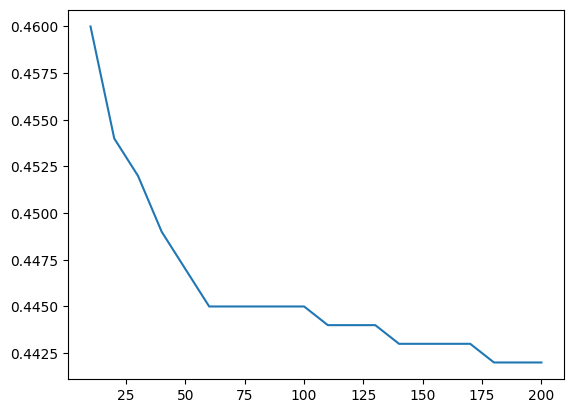

In [33]:
plt.plot(df_scores.n_estimators, round( df_scores.rmse, 3) )

#### Question 4

Let's select the best max_depth:

* Try different values of max_depth:[10, 15, 20, 25]
* For each of these values,
  - try different values of n_estimators from 10 to 200 (with step 10)
  - calculate the mean RMSE
* Fix the random seed: random_state=1

What is the best max_depth, using the mean RMSE?

In [34]:
scores = []

for d in [10, 15, 20, 25]:
    rmse_list = []
    for n in range(10, 201, 10):
        rf = RandomForestRegressor(max_depth=d, n_estimators=n, random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict(X_val)
        rmse = root_mean_squared_error(y_val, y_pred)
        rmse_list.append(rmse)

    scores.append( (d, np.mean(rmse_list) ) )

In [35]:
scores

[(10, np.float64(0.44180786093233565)),
 (15, np.float64(0.44541664456381075)),
 (20, np.float64(0.44625292424422536)),
 (25, np.float64(0.44590993626161624))]

#### Question 5

We will find the most important feature. In Scikit-Learn, tree-based models contain this information in the
feature_importances_ field.

* Train the model with these parameters
  * n_estimators = 10
  * max_depth = 20
  * random_state=1
  * n_jobs=-1 (optional)
* Get the feature importance information from this model.

What is the most important feature (among these 4)?
* vehicle_weight
* horsepower
* acceleration
* engine_displacement

In [36]:
# Train the model for question 5

rf_q5 = RandomForestRegressor(n_estimators=10, max_depth=20, random_state=1, n_jobs=-1)
rf_q5.fit(X_train, y_train)

,n_estimators,10
,criterion,'squared_error'
,max_depth,20
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [37]:
rf_q5.feature_importances_

array([1.14797006e-02, 3.57108549e-04, 3.45384113e-04, 3.27279191e-03,
       3.25424323e-04, 3.60383601e-04, 1.59978977e-02, 3.21230009e-03,
       2.34334695e-03, 1.63498954e-03, 4.62246496e-04, 5.18739639e-04,
       5.39721689e-04, 9.59149965e-01])

In [38]:
dv.get_feature_names_out()

array(['acceleration', 'drivetrain=All-wheel drive',
       'drivetrain=Front-wheel drive', 'engine_displacement',
       'fuel_type=Diesel', 'fuel_type=Gasoline', 'horsepower',
       'model_year', 'num_cylinders', 'num_doors', 'origin=Asia',
       'origin=Europe', 'origin=USA', 'vehicle_weight'], dtype=object)

In [39]:
feature_importances_q5 = pd.Series(rf_q5.feature_importances_, index=list(dv.get_feature_names_out()))
print (feature_importances_q5.sort_values(ascending=False))

vehicle_weight                  0.959150
horsepower                      0.015998
acceleration                    0.011480
engine_displacement             0.003273
model_year                      0.003212
num_cylinders                   0.002343
num_doors                       0.001635
origin=USA                      0.000540
origin=Europe                   0.000519
origin=Asia                     0.000462
fuel_type=Gasoline              0.000360
drivetrain=All-wheel drive      0.000357
drivetrain=Front-wheel drive    0.000345
fuel_type=Diesel                0.000325
dtype: float64


In [40]:
# What is the most important feature (among these 4)? vehicle_weight

#### Question 6

We will train an XGBoost model, and we will tune the `eta` parameter:

* Install XGBoost
* Create DMatrix for train and validation
* Create a watchlist
* Train a model with these parameters for 100 rounds:

xgb_params = {  
   'eta': 0.3,  
   'max_depth': 6,  
   'min_child_weight': 1,  
     
   'objective': 'reg:squarederror',  
   'nthread': 8,  
   
   'seed': 1,  
   'verbosity': 1,  
}  


Then, change `eta` from 0.3 to 0.1.

Which `eta` leads to the best RMSE score on the validation dataset?
* 0.3
* 0.1
* Both give equal values
   

In [41]:
!pip install xgboost

In [ ]:
import xgboost as xgb

In [ ]:
features = list( dv.get_feature_names_out() )
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [ ]:
watchlist = [ (dtrain, 'train'), (dval, 'val') ] 

In [ ]:
%%capture output

xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,
  
    'objective': 'reg:squarederror',
    'nthread': 8,
  
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  verbose_eval=5,
                  evals=watchlist)

In [ ]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int( it_line.strip('[]') )
        train = float( train_line.split(':')[1] )
        val = float( val_line.split(':')[1] )

        results.append( (it, train, val) )

    columns = ['num_iter', 'train_rmse', 'val_rmse']
    df_results = pd.DataFrame( results, columns=columns )
    
    return df_results

In [ ]:
scores = {}

In [ ]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)

In [ ]:
scores

In [50]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 6,
    'min_child_weight': 1,
  
    'objective': 'reg:squarederror',
    'nthread': 8,
  
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  verbose_eval=5,
                  evals=watchlist)

In [51]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=0.1'

In [52]:
scores

{'eta=0.3':     num_iter  train_rmse  val_rmse
 0          0     1.81393   1.85444
 1          5     0.51381   0.55664
 2         10     0.37115   0.43896
 3         15     0.34666   0.43362
 4         20     0.33553   0.43376
 5         25     0.32268   0.43683
 6         30     0.31475   0.43752
 7         35     0.30960   0.43784
 8         40     0.30202   0.43968
 9         45     0.29126   0.44024
 10        50     0.28456   0.44140
 11        55     0.27618   0.44225
 12        60     0.26768   0.44290
 13        65     0.26174   0.44352
 14        70     0.25489   0.44531
 15        75     0.24792   0.44628
 16        80     0.24254   0.44689
 17        85     0.23644   0.44749
 18        90     0.23193   0.44839
 19        95     0.22475   0.44904
 20        99     0.21950   0.45018,
 'eta=0.1':     num_iter  train_rmse  val_rmse
 0          0     2.28944   2.34561
 1          5     1.41247   1.44988
 2         10     0.91008   0.94062
 3         15     0.63402   0.66672
 4   

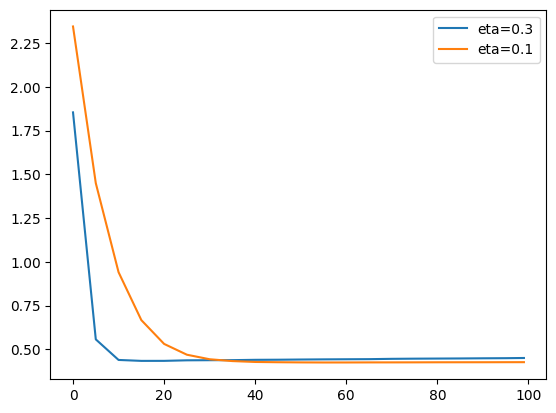

In [53]:
# Plot the rmse of the validation datasets for the 2 eta values

for eta_value, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_rmse, label=eta_value)

plt.legend()

In [54]:
# Which eta leads to the best RMSE score on the validation dataset? eta=0.1